In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Dataframes import contratos_df

In [34]:
contratos_df
contratos_df.head()

,REGIONGEOGRAFICA,CODIGOCONTRATO,CODIGOBIP,NOMBRECONTRATO,SERVICIO,CENTROGESTION,TIPOGASTO,ESTADO,FECHAINICIO,FECHATERMINO,FECHATERMINOORIGINAL,MONTOINICIAL,MONTOVIGENTE,IDCHILECOMPRA,RUTADJUDICADO,NOMBREADJUDICADO,MODALIDADLICITACION,MODALIDADCONTRATACION,TIPOREAJUSTE,TIPO_PERFIL,AVANCEFINANCIERO,MANDANTE,MERGERUT,ATRASO
1,Atacama,15239,NaN,Conservación Repar Edificios M.O.P. 1999,ARQUITECTURA,Dirección de Arquitectura III Region,Obra,Terminado,2010-04-15,2010-04-30,2010-04-30,2593916,2593916,NaN,7288982,JORGE ALEXIS CANTO VERGARA,Propuesta privada,PRECIOS UNITARIOS,Sin Reajuste,NaN,0.0,Externos,7288982,Adelantado/A tiempo
2,Aysén,91114,30237372-0,ENCAUZAMIENTO MAQUINARIA PESADA RÍO EL SILENCI...,OBRAS HIDRÁULICAS,Dirección de Obras Hidráulicas XI Region,Obra,Terminado,2015-12-03,2015-12-23,2015-12-23,18831750,18831750,1149-36-LE15,9176977,LUIS PATRICIO ROA MUNOZ,Propuesta publica,SUMA ALZADA,Sin Reajuste,Contratista O. Menores,1.0,Internos,9176977,Adelantado/A tiempo
3,Aysén,91131,30101318-0,CONSERVACION RED PRIMARIA DE AGUAS LLUVIAS PUE...,OBRAS HIDRÁULICAS,Dirección de Obras Hidráulicas XI Region,Obra,Terminado,2013-10-10,2013-12-29,2013-12-29,38672320,44159338,1149-26-LE13,9176977,LUIS PATRICIO ROA MUNOZ,Propuesta publica,SUMA ALZADA,Sin Reajuste,Contratista O. Menores,1.0,Internos,9176977,Adelantado/A tiempo
4,Aysén,102609,30101318-0,"CONSERVACIÓN RED PRIMARIA DE AGUAS LLUVIAS, PU...",OBRAS HIDRÁULICAS,Dirección de Obras Hidráulicas XI Region,Obra,Terminado,2013-05-31,2013-12-21,2013-11-27,232472551,243663811,1149-3-LP13,76058293,SOCIEDAD FINLEZ Y RUIZ LTDA.,Propuesta publica,SUMA ALZADA,Sin Reajuste,Contratista O. Menores,1.0,Internos,76058293,Atrasado
5,Aysén,105315,20134702-0,"CONTROL ALUVIONAL CERRO DIVISADERO, COYHAIQUE....",OBRAS HIDRÁULICAS,Dirección de Obras Hidráulicas XI Region,Obra,Terminado,2010-09-14,2010-12-23,2010-12-23,127261394,141959548,1149-23-LP10,13112804,MANUEL FERNANDO SUAZO ILLESCA,Propuesta publica,SUMA ALZADA,Sin Reajuste,Contratista O. Menores,1.0,Internos,13112804,Adelantado/A tiempo


In [35]:
contratos_df = contratos_df[contratos_df['ESTADO'] == 'Terminado']
contratos_df['ATRASO'] = (contratos_df['FECHATERMINO'] - contratos_df['FECHATERMINOORIGINAL']).dt.days
contratos_df['ATRASO'] = contratos_df['ATRASO'].map(lambda x: 'Atrasado' if x > 31 else 'Adelantado/A tiempo').astype('category')

In [22]:
contratos_df['ATRASO']

1        Adelantado/A tiempo
2        Adelantado/A tiempo
3        Adelantado/A tiempo
4                   Atrasado
5        Adelantado/A tiempo
                ...         
18234    Adelantado/A tiempo
18236    Adelantado/A tiempo
18238    Adelantado/A tiempo
18242    Adelantado/A tiempo
18247    Adelantado/A tiempo
Name: ATRASO, Length: 15230, dtype: category
Categories (2, object): ['Adelantado/A tiempo', 'Atrasado']

Text(0.5, 0, 'Categoria del proyecto')

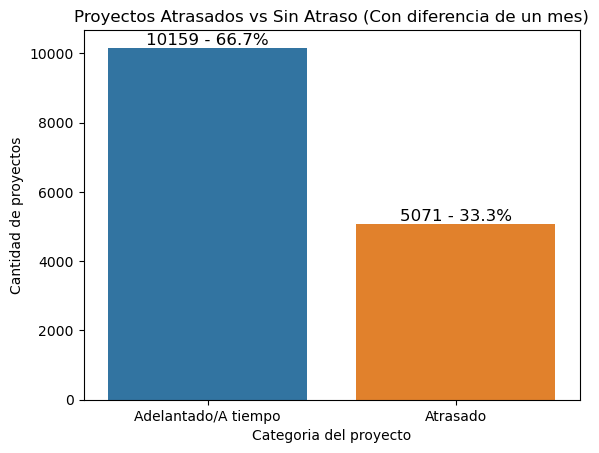

In [37]:
grafico = sns.countplot(contratos_df, x='ATRASO', hue='ATRASO', stat='count')
for p in grafico.patches:
    height = p.get_height()
    grafico.text(
        p.get_x() + p.get_width() / 2,
        height + 0.1,
        str(int(height)) + f' - {round(height*100/len(contratos_df), 2)}%', 
        ha='center', 
        va='bottom',
        fontsize=12  
    )    
plt.title('Proyectos Atrasados vs Sin Atraso (Con diferencia de un mes)')
plt.ylabel('Cantidad de proyectos')
plt.xlabel('Categoria del proyecto')

In [42]:
contratos_df['FECHAINICIO'].sort_values(ascending=True)

191     2010-01-01
190     2010-01-01
142     2010-01-01
143     2010-01-01
832     2010-01-01
           ...    
17533   2024-05-23
17982   2024-06-06
17531   2024-06-06
17349   2024-06-13
17538   2024-06-26
Name: FECHAINICIO, Length: 15230, dtype: datetime64[ns]